## Section 01:Data cleaning and Exploratory Data Analysis
Must have:
1. Explore dataset features?
2. Create new features if needed?
3. Are there any null values or outliers, replacing NaN values if needed?

## Section 02: Statistical Analysis
1. Compute some statistics

## Section 03: Data Visualization
Good to have:

1.Please plot and visualize the answers to the below questions.
Which marketing campaign is most successful?
Which products are performing best?
Which channels are underperforming?
2. Create static and dynamic visualization to tell a story
3. Dashboard: Make a dashboard with Dash library (or Sreamlit library)
Comment on each step, tell a story, the notebook should be a report

## Section 04: Machine learning

1. Machine Learning Model: Choose a target column of the dataset,
2. split the dataset between training data and test data, and train a simple machine learning model


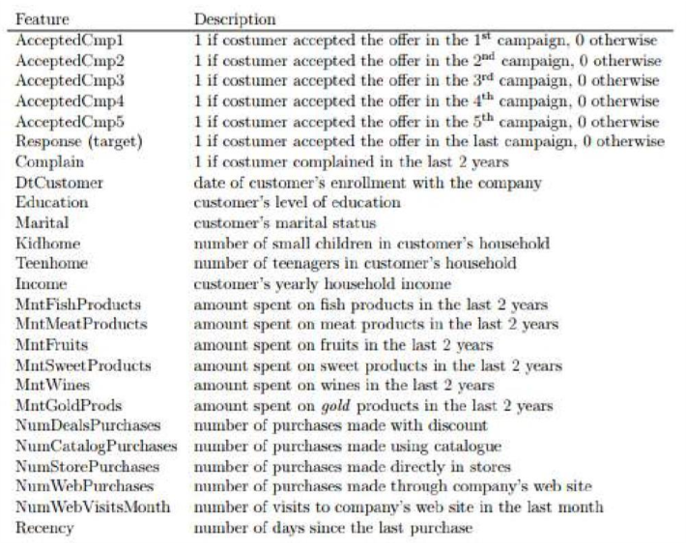

In [7]:
from PIL import Image, ImageDraw, ImageFilter
myImage = Image.open("C:/Users/ashia/OneDrive - Data ScienceTech Institute/Python Lab DSTI/MyPythonProject/Marketing/marketing.png")
myImage

## =========#Loading the required libraries==============

In [58]:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline
from datetime import datetime
import matplotlib.pyplot as plt 
import seaborn as sns
#%matplotlib inline
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from datetime import date
import plotly.graph_objects as go # creates plots
import numpy as np # standard for data processing
import pandas as pd # standard for data processing
from sklearn import preprocessing
import plotly.express as px

## ==============#Loading the raw dataset================

In [59]:

path_to_csv =("C:/Users/ashia/OneDrive - Data ScienceTech Institute/Python Lab DSTI/MyPythonProject/Marketing/marketing_data.csv")
df_m = pd.read_csv(path_to_csv)
df_m.head(5)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [60]:
print(f'No. of rows in the dataset: {df_m.shape[0]}\nNo. of columns in the dataset: {df_m.shape[1]}')

No. of rows in the dataset: 2240
No. of columns in the dataset: 28


There are 2240 observation and 28 features.

## =================Data cleaning=======================

In [13]:
df_m.info()#To get information about the data and the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

## Observations

1. There are 5 categorical features (object) and 23 numerical features
2. Income is under object datatype - need to change it into numerical feature
3. Dt_Customer is under object datatype - need to convert to date type
4. There is spaces in Income column names
5. Removed the $ sign from Income column

In [14]:
df_m.columns = df_m.columns.str.strip() #This allows me to get rid of the spaces in the all headers in my dataframe
#df_m.rename(columns = {" Income ":"Income"},inplace = True)
df_m["Income"] = df_m["Income"].str.replace(",","")#To remove the common from the Income
df_m["Income"] = df_m["Income"].str.replace("$","")#To remove the dollar 
df_m["Income"] = df_m["Income"].astype("float")#Convert the object to float
df_m["Dt_Customer"] = pd.to_datetime(df_m["Dt_Customer"])#Convert the Dt_Customer to datetime

<ipython-input-14-57fc3c2d51bd>:4: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



### Renaming some columns name and extract year name from date column

In [15]:
df_m.rename(columns={"Dt_Customer":"Date_Customer"},inplace =True)
df_m.rename(columns={"Kidhome":"Kids"},inplace =True)
df_m.rename(columns={"Teenhome":"Teens"},inplace =True)
#Define a function to change the country name from abbrevate to real name.
def replace_country_name(x):
    country =x['Country']
    for i in range(len(country)):
        if country[i] == 'SP':
            country[i] = 'Spain'
        elif country[i] == 'ME':
            country[i] = 'Montenegro'
        elif country[i] == 'IND':
            country[i] ='India'
        elif country[i] == 'CA':
            country[i] = 'Canada'
        elif country[i] == 'AUS':
            country[i] ='Australia'
        elif country[i] == 'GER':
            country[i] ='Germany'
        elif country[i] == 'US':
            country[i]='United State'
        else:
            country[i]='South Africa'
    x['Country'] = country
        
    return x
df_m = replace_country_name(df_m)




<ipython-input-15-cc2fa7d3a6f4>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-15-cc2fa7d3a6f4>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-15-cc2fa7d3a6f4>:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-15-cc2fa7d3a6f4>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

In [16]:
#Checking the statitics summary of the features
df_m.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kids,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teens,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


## Are there any null values or outliers

In [17]:
#checking for NAs values from the data frame
missing_value = df_m.isna().sum().reset_index()
missing_value.columns = ['features', 'total_missing']
missing_value['percent'] = (missing_value['total_missing'] / len(df_m)) * 100
missing_value.index = missing_value['features']
del missing_value['features']
missing_value.T


features,ID,Year_Birth,Education,Marital_Status,Income,Kids,Teens,Date_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
total_missing,0.0,0.0,0.0,0.0,24.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
percent,0.0,0.0,0.0,0.0,1.071429,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
missing_value = df_m.isna().sum().reset_index()
missing_value.columns=['features','total']
missing_value['percetage']= missing_value['total']/len(df_m)*100
missing_value.index=missing_value['features']
del missing_value['features']
missing_value

,total,percetage
features,,
ID,0,0.000000
Year_Birth,0,0.000000
Education,0,0.000000
Marital_Status,0,0.000000
Income,24,1.071429
Kids,0,0.000000
Teens,0,0.000000
Date_Customer,0,0.000000
Recency,0,0.000000


From the Income there are 24 NA values of 1%.

### Checking for outlier

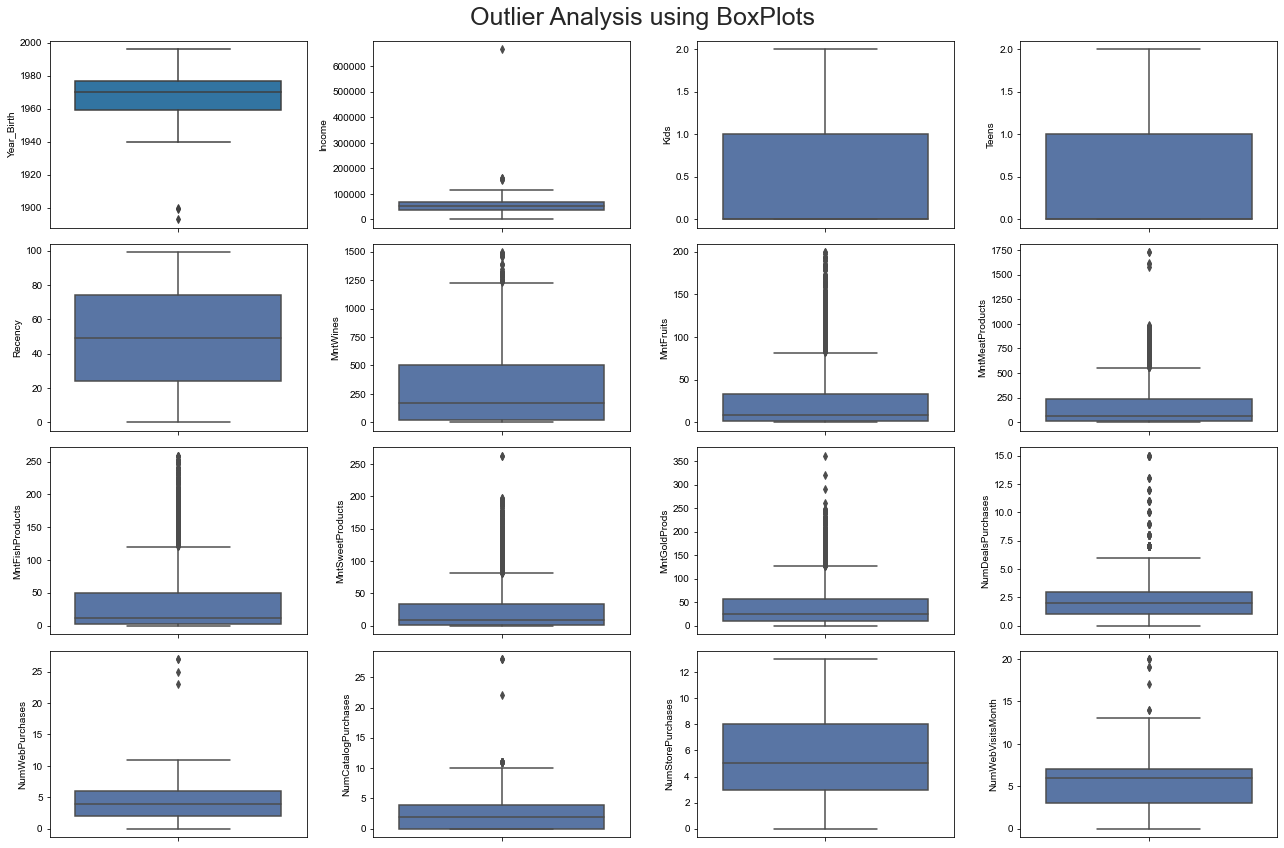

In [19]:
#Using list comprehension
cols_to_check = [col for col in df_m.columns 
                 if (df_m[col].dtype != 'object') & (df_m[col].nunique() > 2) &
                 (col != 'ID')&(col != 'Date_Customer')]

fig, ax = plt.subplots(nrows=4, ncols=4, figsize = (18, 12))
ax = ax.flatten()
for i, c in enumerate(cols_to_check):
    sns.boxplot(y = df_m[c], ax = ax[i])
    sns.set_theme(style="whitegrid")
plt.suptitle('Outlier Analysis using BoxPlots', fontsize = 25) 
fig.tight_layout()


#There are few outlier in Income column and outlier in Year_Birth so I need to remove it 

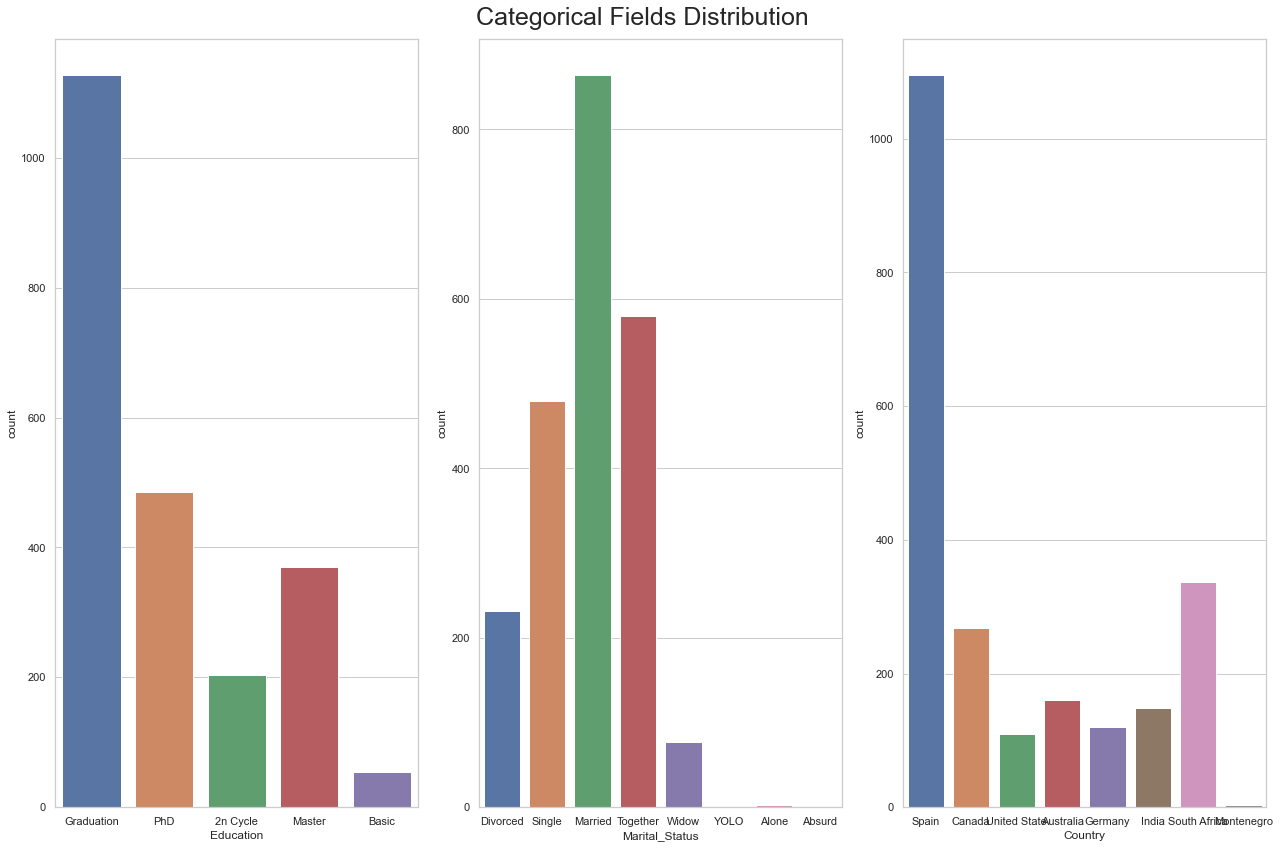

In [20]:
#Count Plots {Plots of categorical column and count}
check_unique_value = [col for col in df_m.columns if (df_m[col].dtype == 'object')]
 
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (18, 12))
ax = ax.flatten()
for i, c in enumerate(check_unique_value ):
    sns.countplot(x=df_m[c],ax=ax[i])#y=check_unique_value,ax=ax[i]
    sns.set_theme(style="whitegrid")
plt.suptitle('Categorical Fields Distribution', fontsize = 25) 
fig.tight_layout()

In [21]:
df_m.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kids                      3
Teens                     3
Date_Customer           663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Response                  2
Complain                  2
Country                   8
dtype: int64

In [22]:
#Checking the outlier using for Zscore method since the Year_Birth have the outlier in lower limit
year_outliers = df_m['Year_Birth'][df_m['Year_Birth'] < df_m['Year_Birth'].mean() - 3 * df_m['Year_Birth'].std()]
year_outliers

513     1893
827     1899
2233    1900
Name: Year_Birth, dtype: int64








There are 3 outliers values shown above

In [23]:
#Checking the outlier using for Zscore method since the Income have the outlier in upper
income_outliers = df_m['Income'][df_m['Income'] > df_m['Income'].mean() + 3 * df_m['Income'].std()]
income_outliers

325     157146.0
497     160803.0
527     666666.0
731     162397.0
853     157733.0
1826    153924.0
1925    156924.0
2204    157243.0
Name: Income, dtype: float64

1. There are 8 outliers values as shown above

## How will you handle NAs values and outliers ?

In [24]:
print(df_m["Income"].mean())
print(df_m["Income"].median())

52247.25135379061
51381.5


In [25]:
#Replacing the NAs with median values
df_m["Income"] =df_m["Income"].fillna(51381.5)

print(f'Number of Null values in *Income* after replacement: {df_m["Income"].isna().sum()}')

Number of Null values in *Income* after replacement: 0


In [26]:
# Remove the income outlier 
#since the anomalies values are between 200000 and 600000
df_m[df_m.Income>200000]# There is one row that contain the outlier


,ID,Year_Birth,Education,Marital_Status,Income,Kids,Teens,Date_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
527,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,3,6,0,0,0,0,0,0,0,South Africa


<AxesSubplot:ylabel='Income'>

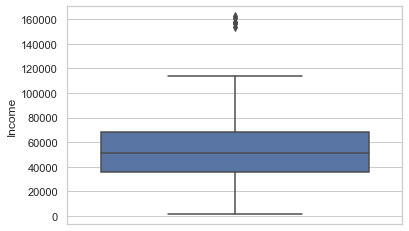

In [27]:
df_m = df_m.drop(df_m.index[527])#drop the row
sns.boxplot(y=df_m['Income'])#After removing the outliers

In [28]:
# Remove the Year_Birth outlier 
#since the anomalies values are between 1940 and 1990
df_m[df_m.Year_Birth<1940].index

Int64Index([513, 827, 2233], dtype='int64')

<AxesSubplot:ylabel='Year_Birth'>

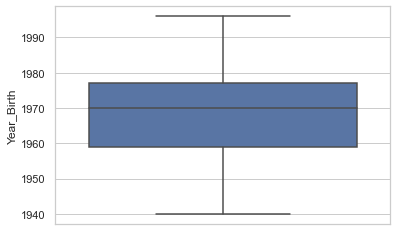

In [29]:
df_m = df_m.drop(df_m[df_m.Year_Birth<1940].index)#drop the row
sns.boxplot(y=df_m['Year_Birth'])#After removing the outliers

# ==================Analysis==============

## Createing a new variables
1. Create number of children/dependents in home by adding 'Kidhome' and 'Teenhome' features
2. Create number of Total_Purchases by adding all the purchases features
3. Create TotalAmount_Spent by adding all the Mnt* features


In [30]:
#Creating age column to know the income by the age
df_m['Date_Customer_Month'] = df_m['Date_Customer'].dt.month
df_m['Date_Customer_Year'] = df_m['Date_Customer'].dt.year
df_m["Year_Birth"] = df_m["Year_Birth"].astype('str')
def calculate_age(born):
        born = datetime.strptime(born, "%Y").date()
        today = date.today()
        return today.year - born.year 

df_m['Customer_Age'] = df_m['Year_Birth'].apply(calculate_age)


In [31]:
#Calculating the total amount spent 
## creating the Totalspent per househood and the ratio of the total spent
Mtn_cols = [col for col in df_m.columns if 'Products' in col]
df_m["Expenditure"]= df_m[Mtn_cols].sum(axis=1)
df_m["Ratio"] = df_m.apply(lambda row: row.Expenditure/row.Income,axis=1)#ratios of the Amount and Income 

## creating the total no of children in the househoold
df_m["Noofchildren"] =df_m.apply(lambda row: row.Teens + row.Kids,axis=1)

# creating the total number of purchases
purchases_cols = [col for col in df_m.columns if 'Purchases' in col]
df_m['Totalpurchases']=df_m[purchases_cols].sum(axis=1)

#creating the total number of the campaign
df_m['Totalcmp']=df_m.apply(lambda row:row.AcceptedCmp1 + row.AcceptedCmp2 +row.AcceptedCmp3+row.AcceptedCmp4 +row.AcceptedCmp5 + row.Response,axis=1)


Text(0.5, 1.0, 'Histogram Distribution of Customer Age')

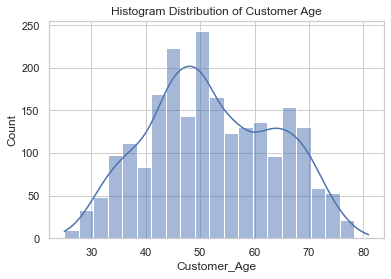

In [32]:
sns.histplot(df_m,x='Customer_Age',kde=True)
plt.title('Histogram Distribution of Customer Age')

# ===============Visualisation=======================
1. Which marketing campaign is most successful?
2. Which products are performing best?
3. Which channels are underperforming?
4. Which Country that have Income and Expenditure?
5. Customer_Age by Expenditure

In [33]:
groupped_country = df_m.groupby(by='Country',as_index=False).sum()
fig =px.bar(groupped_country,x='Country',y='Income',text='Income',orientation ='v',labels=dict(Country='Country',tip='Tip ($)',
                                        Income='Income ($)'), title="Income by Country",height=450)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()


In [34]:
#Expenditure....Amount spent
groupped_country = df_m.groupby(by='Country',as_index=False).sum()
px.bar(groupped_country,x='Country',y='Expenditure',text='Expenditure',orientation ='v',labels=dict(Country='Country',tip='Tip ($)',
                                        Income='Income ($)'), title="Expenditure by Country")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

## Observation:
From the above bar chat shown that Spain has the higest Income and the highest Totl Expenditure follow by South Africa and Montengo has the least Income and Total Expenditure.

In [35]:
#Statistical analysis using boxplot to get insight on Number of purchases
df_mpurchase=df_m.iloc[:,15:19]
px.box(df_mpurchase,range_y=[0,20] ,labels=dict(variable='Purchases',
                                        value='Number'),title="Number of purchases")

In [36]:
# calculate success rate (percent accepted)
camp_success = pd.DataFrame(df_m[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()*100, 
                           columns=['Percent']).reset_index()
# plot
fig = px.bar(camp_success,x='Percent',y='index',labels=dict(index='Campaign',
                                     Percent='Accepted (%)'),title="Marketing campaign success rate")
fig.update_layout(barmode='stack',yaxis={'categoryorder':'total descending'})

# Observation:
From the markeing campaign success rate shown that the response got the highest accepted amont the others.

In [37]:
#Expenditure by products
Mtnproduct=pd.DataFrame(df_m[[ 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].mean()*100, 
                           columns=['Percent']).reset_index()
Mtnproduct
fig = px.bar(Mtnproduct,x='Percent',y='index',labels=dict(index='Different products',
                                        percent='Expenditure  (%)'),title="Expenditure by different products")
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total descending'})


# Observation:
There is no difference between the income and expenditure by education. Basisc has the lowest income and expenditure.

In [38]:
#Pie chat to know the percentage of marital status in th household
fig = px.pie(df_m, names='Marital_Status', values='Expenditure',hole=.3,title='Expenditure by Education')
fig.show()

# Observation:
Married has the highest percentage of 37.2%,26% for Together and Absund has the least.

In [39]:
#Expenditure by Number of children in the household
df_m['Noofchildren'] = df_m['Noofchildren'].replace({0:'Zero',1:'One',2:'Two',3:'Three'})
fig = px.pie(df_m, values="Expenditure", names="Noofchildren",hole=.3,labels=dict(Income='Income ($)',tip='Tip ($)',
                                        TotalSpent='Total Expenditure ($)'),title="Expenditure by number of children")
fig.show()


# Observation:
The above graph shown that expenditure per household doesnt determine by the number of children.
The zero children has the highest expenditure,while the three has the least.

In [40]:

px.histogram(df_m,
                 x='Customer_Age',
                 nbins=20,
                 labels=dict(x='Customer_Age',
                 title="Histogram Distribution of Customer Age"))


In [41]:
# Obeservation:
The histogram distribution of Customer Age shown

SyntaxError: invalid syntax (<ipython-input-41-6ef2e691de68>, line 2)

# ============Model============================

In [ ]:
#Ploting the correlation between the dataset
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(np.abs(df_new.corr()), annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

The above shown that some fetures have a weak relationship

# Data  preprocessing

In [ ]:
#Droping the features 
df_new = df_m.select_dtypes(exclude='object')
df_new2 = df_new.drop(['ID','Date_Customer','AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp2', 'Response', 'Complain', 'Age','TotalSpent','Ratio','AcceptedCmp5', 'AcceptedCmp1', 'Totalpurchases','AcceptedCmp5', 'AcceptedCmp1', 'Totalpurchases', 'Totalcmp'], axis=1)


In [ ]:
#Ploting the correlation between the dataset
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(np.abs(df_new2.corr()), annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')


In [ ]:
###########################################################
# Build ML regression model by extracting the features
###########################################################
df_new_select = df_new.loc[:,['NumCatalogPurchases','NumStorePurchases','MntWines','MntFruits',
       'MntMeatProducts','MntFishProducts','Income','NumWebVisitsMonth','MntSweetProducts']]

In [ ]:
# Prepare data for ML training 
df_train, df_test = train_test_split(df_new_select,test_size = 0.3)

In [ ]:
#########################
# Creating Input and the output for machine learning ML model 
#########################
X_train = df_train.loc[:,['Income','NumCatalogPurchases','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts','MntSweetProducts','NumWebVisitsMonth']].values
y_train = df_train.loc[:,'MntMeatProducts'].values
X_test = df_test.loc[:,['Income','NumCatalogPurchases','MntWines','MntFruits',
       'MntMeatProducts','MntFishProducts', 'MntSweetProducts','NumWebVisitsMonth']].values
y_test = df_test.loc[:,'MntMeatProducts'].values


In [ ]:
groupped_country = df_m.groupby(by='Country',as_index=False).sum()
bar1 = px.bar(groupped_country,x='Country',y='Income',orientation ='v',labels=dict(Country='Country',tip='Tip ($)',
                                        Income='Income ($)'), title="Income by Country")

In [ ]:
###################
#MaxMinscaling
# scaling my features by using normalizedscaling because I have some larger values between the features
######################
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax.shape

In [ ]:
X_test_minmax = min_max_scaler.fit_transform(X_test)
X_test_minmax.shape

In [ ]:
min_max_scaler.scale_

In [ ]:
min_max_scaler.min_

In [ ]:
##############################
#DecisionTreeRegressor
##############################
dt_model = DecisionTreeRegressor(criterion='mse',splitter='best',)
dt_model.fit(X=X_train,y=y_train)#training my model
y_test_predicted_dt = dt_model.predict(X_test)
report_dt = dt_model.score(X_test,y_test)
ypred=dt_model.predict(X_test)
#print(ypred)
#print(y_test)
print("DecisionTreeRegressor")
print('predict model for MtnMeatProducts')
print(report_dt)


In [ ]:
##################################
#=======Muliple Linear Regression MtnMeatProduct
####################################
lr_model = LinearRegression()
lr_model.fit(X=X_train,y=y_train)
y_test_predicted = lr_model.predict(X_test)
report_lr = lr_model.score(X_test,y_test)
predy = lr_model.predict(X_test)
#print(predy)
#print(y_test)
print("Linear_Regression")
print('Predict model for MtnMeatProducts')
print(report_lr)

In [ ]:
#######################################################
# Multi-Layer Perceptron (MLP) Model for MtnMeatProduct
#######################################################
from sklearn.metrics import r2_score
nn_model = MLPRegressor(hidden_layer_sizes=(200,100),max_iter=5000, verbose=False, tol=0.0000001,early_stopping=False,).fit(X=X_train,y=y_train)
y_test_predicted_nn = nn_model.predict(X_test)
report_nn = nn_model.score(X_test,y_test)
print("Multi-Layer Perceptron")
print('predict model for MtnMeatProducts')
print(report_nn)
px.line(nn_model.loss_curve_)

# Observation
Comparing the three model above,we can see that the three predict it well for the Amount spent on meat product.The R^2 have the predict of 1.0,0.99 and 0.99 each model representively.

In [ ]:
# Conclution:
1. The dataset 2240 No. of rows and 28 No. of columns
# From the analysis and visualisation 
1. Spain has the highest income and expenditure 
2. Analysis based on Marital status by expenditure. Those are married has 37% of expenditure,follow by together with 26%
3. For the income and expenditure by education, 
4. Wine products has the highest average expenditure,follow by meatproducts
5. Number of children doestnt depend on how the house spent Amount.

In [ ]:
# saving the dataframe
df_m.to_csv('marketing_dash.csv')